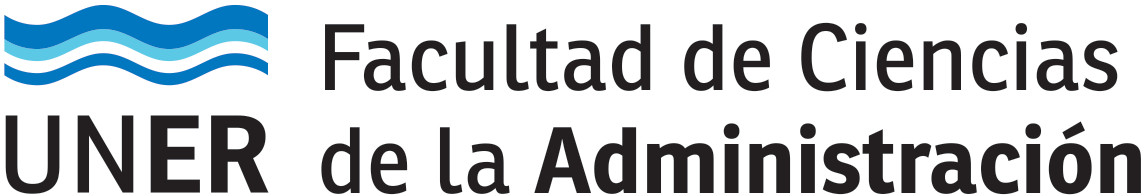

# **TP 5**: Aprendizaje I

## **Fecha de entrega**: 02/07/2025 a las 23:59hs.

**Condiciones de entrega:** el trabajo práctico deberá ser realizado en forma individual. Se deberá subir en la sección del Campus Virtual correspondiente el enlace a Colab. No olvidar configurar el documento para que sea accesible a cualquier persona con el enlace o en su defecto compartirlo con cristian.pacifico@uner.edu.ar y antonella.garcia@uner.edu.ar

Los datasets necesarios los encuentran en la carpeta compartida a inicio del cuatrimestre "**IA-1C2025**".

Se debe presentar el código solución a la consigna y algunas líneas adicionales de código que sirvan para testear la solución presentada. Además, pueden incluir en un campo de texto las respuestas, suposiciones y aclaraciones pertinentes de cada punto.

# **Arboles de decisión.**

# **Dataset**: [MBA](https://www.kaggle.com/datasets/taweilo/mba-admission-dataset)

####Utilizar el dataset MBA.csv, que contiene datos sintéticos generados a partir de las estadísticas de la Clase Wharton 2025 de University of Pennsylvania. El objetivo es analizar los datos y construir un modelo que prediga el estado de admisión de los estudiantes.
####Metadatos:
* application_id: Identificador único para cada aplicación
* género: género del solicitante (masculino, femenino)
* internacional: Estudiante internacional (VERDADERO/FALSO)
* gpa: Promedio de calificaciones del solicitante (en una escala de 4.0)
* Especialidad: Licenciatura (Negocios, STEM, Humanidades)
* raza: origen racial del solicitante (por ejemplo, blanco, negro, asiático, hispano, otro / nulo: estudiante internacional)
* gmat: Puntuación GMAT del solicitante (800 puntos)
* work_exp: Número de años de experiencia laboral (Año)
* work_industry: Industria de la experiencia laboral previa del solicitante (por ejemplo, consultoría, finanzas, tecnología, etc.)
* Admisión: Estado de admisión (Admitir, Lista de espera, Nulo: Denegar)

1. Carga el dataset "MBA.csv" en un DataFrame "df" y mostrar las primeras 5 filas.

In [1]:
import pandas as pd

#incorporar el código 
df = pd.read_csv("MBA.csv")

df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. Mostrar la información básica y las estadísticas descriptivas de las variables.

In [9]:
#incorporar el código correspondiente
df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000


In [11]:
df.isnull().sum()

application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64

## Preprocesamiento del DataFrame.

3. Asignar el valor "Denegado" a las filas que contengan valores nulos en la columna "Admisión".

In [12]:
#incorporar el código correspondiente

df['admission'] = df['admission'].fillna('Denegado')

df['admission'].isnull().sum()

np.int64(0)

4. Convertir las variables categóricas a valores numéricos y estandarizar las columnas que sean necesarias para el análisis.

In [ ]:
#incorporar el código correspondiente

df_procesamiento = df.copy()

if 'application_id' in df_procesamiento.columns:
    df_procesamiento = df_procesamiento.drop('application_id', axis=1)



5. Separar los datos en entrenamiento y testeo, utilizando el 25% de los datos para testeo.

In [ ]:
#incorporar el código correspondiente

6. Construir un modelo de árbol de decisión para predecir si un estudiante será admitido o no.

In [ ]:
#incorporar el código correspondiente

7. Calcular las métricas que permitan evaluar la precisión del modelo.

In [ ]:
#incorporar el código correspondiente

8. A partir de las métricas obtenidas: ¿Qué podemos decir del modelo creado?

In [ ]:
#incorporar el código correspondiente

#**Dataset** *car.csv*
Se debe crear un modelo de árbol de decisión confiable que sea capaz de ayudar a una empresa a encontrar automóviles que los clientes probablemente comprarán. Se debe construir un modelo de árbol de decisión que clasifique los automóviles como aceptables o no aceptables.
El dataset se encuentra disponible en el campus junto a este práctico *car.csv* y se compone de seis características diferentes: compra, mantenimiento, puertas, personas, maletero y seguridad. La variable objetivo clasifica la aceptabilidad de un automóvil determinado. Puede tomar 0 o 1, siendo 1 aceptable.

1. Utilizar el 70\% de los datos para entrenamiento y el 30\% restante para testeo.

In [ ]:
#incorporar el código correspondiente

2. Evaluar la precisión del modelo utilizando **Accuracy**.

In [ ]:
#incorporar el código correspondiente

3. A partir de la métrica obtenida: ¿Qué podemos decir del modelo creado?

**Introduzca su respuesta aquí...**

# **Regresión Logística**

# **Dataset**: *Breast Cancer.csv*

Utilizar el dataset de cáncer de mama disponible en sklearn para predecir la presencia de cáncer maligno utilizando regresión logística.

1. Utilizar el 20\% de los datos para testeo.

In [ ]:
#incorporar el código correspondiente

2. Evaluar el rendimiento del modelo utilizando las métricas **Accuracy**, **Precision** y **Recall**.

In [ ]:
#incorporar el código correspondiente

3. Obtener la matriz de confusión del modelo.

In [ ]:
#incorporar el código correspondiente

# **Dataset**: *ClientesEnLinea.csv*

Crear un modelo de Regresión Logística utilizando el dataset *ClientesEnLinea.csv* que cuenta con información de clientes que compran o no ciertos productos en línea para ello contamos con información sobre el género, la edad y el salario estimado, clasificando a los clientes con 0 y 1 si no compró o si compró respectivamente.

1. Utilizar como métrica comparativa el promedio de una validación cruzada K-fold con 5 folds para entrenamiento y testeo.

In [ ]:
#incorporar el código correspondiente

2. ¿Cómo se comporta el modelo si consideramos todos los predictores?

**Introduzca su respuesta aquí...**

3. ¿Qué sucede cuando solo consideramos como predictores Sexo y Edad?

In [ ]:
#incorporar el código correspondiente

**Introduzca su respuesta aquí...**

#***Regresión lineal***

# **Dataset**: *articulos_ml.csv*

A partir del dataset *articulos_ml.csv* que se encuentra disponible en el campus y contiene diversas URLs a artículos sobre Machine Learning. Se debe construir un modelo de regresión lineal para predecir cuantas veces será compartido un artículo en redes sociales basándonos en la cantidad de palabras del artículo.

1. Mostrar las columnas disponibles en el dataset *articulos\_ml.csv*.

In [ ]:
#incorporar el código correspondiente

2. Crear gráficos para visualizar la relación entre las variables del dataset.

In [ ]:
#incorporar el código correspondiente

3. Filtrar los artículos que tengan menos de 3500 palabras y una cantidad de compartidos menor a 80,000 para analizar un conjunto más específico de datos.

In [ ]:
#incorporar el código correspondiente

4. Utilizar los datos filtrados para generar un modelo de regresión lineal y graficar la relación entre las palabras del artículo y la cantidad de veces que son compartidos.

In [ ]:
#incorporar el código correspondiente

5. Utilizar el modelo generado para predecir la cantidad de veces que serán compartidos artículos de 2000, 5000 y 10000 palabras.

In [ ]:
#incorporar el código correspondiente

6. Mostrar los coeficientes del modelo.

In [ ]:
#incorporar el código correspondiente

7. Evaluar el modelo aplicando las métricas **Error Cuadrático Medio** y **Coeficiente de Determinación (R2)**.

In [ ]:
#incorporar el código correspondiente